# Fraudulent Auto Insurance Claim Detection Model 

In [1]:
#img.

<hr ___ />

## Overview 
Accoding to Verisk Analytics, auto insurance fraud is a $29 billion problem. This is a result of omitted or misrepresented underwriting information and criminally inflated claims, leading to inadequate insurance and lower rates. But, there is no such thing as a free lunch. As you can imagine, this means that Insurance Companies are getting scammed out of money, and their customer's wallets are collectively taking the hit.  The goal of our model is to predict what auto insurance claims are likely to be overinflated. 

The Fraudulent Auto Insurance Claim Detection Model developed in this project could be of great value to any insurance company seeking to probe for and detect fraudulent or inflated insurance claims.  

## Business Understanding  

According to the FBI, the average(and most likely hard working, rule following) American family spends an extra $400 to $700 on insurance premiums every year because of insurance fraud.

A major insurance company (think All-State, StateFarm, Geico, etc.) approached John and I a few weeks ago to help out their fraudulent claim division. Putting thier customers' needs first, they beleive they can save their company and their customers a substantial dollar amount if they had a better way to detect inflated and fraudlent insurance claims. 

There must be something in the air in the "Windy City, becuase Chicago proper is one of our clients most fraudenlt territories in the United States. Before implementing nationally, they want to test a beta model in Illinois to guage efficacy. Utilizing the city of Chicago's transportation data portal, we were able to access information on every single documented car crash. Speficially, we used three sizable dataframes holding information about:

1)The crash itself 

2)The people involved 

3)The vehicles involved 

## Data Understanding and Preparation
All the data used was gathered from the city of Chicago's "Chicago Data Portal". In order to get the most relevant data, we isolated the data taken between January of 2017 and January of 2022. We used three dataframes: 1) "Traffic Crashes - Crashes"   2) "Traffic Crashes - People"   3) "Traffic Crashes - Cars"



Raw Data:

Traffic Crashes - Crashes: 617,346 rows × 49 features

Traffic Crashes - People: 777,348 rows × 11 features

Traffic Crashes - Cars:  1,266,486 rows × 72 features



Refined and merged data, before OneHotEncoding:  616067 rows × 41 columns


Our target variable comes from the "Traffic Crashes - Crashes dataset". It was originally called "DAMAGE", and contained information on the cost of damages to the car, which could be one of three categories: "Under 500 dollars"(12 percent), "500-1500 dollars"(28 percent), and "Over 1500 dollars(60 percent)". 

In order to make our target binary and more balanced we combined the first two categories, making our new target: "Under 1500 dollars"(40 percent), "Over 1500 dollars"(60 percent). 

In [158]:
#import modules 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Import, explore, and clean "Crash" Data

In [3]:
#import Crash DataFrame 
crash_df = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv')

In [4]:
crash_df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0001dc2c34878baec9b7223e7ead101e0487e2e994c977...,JF221668,NaN,04/27/2022 09:30:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,1.0,0.0,2.0,0.0,9,4,4,41.926951,-87.661559,POINT (-87.661558949813 41.926951230142)
1,00554edcbf68c6eb4d438e92ce71a593e858971fd885a4...,JF228356,NaN,05/03/2022 06:40:00 AM,15,OTHER REG. SIGN,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,5.0,0.0,6,3,5,41.927526,-87.765423,POINT (-87.765422741103 41.927525861297)
2,01143c127253f877ec850422012fae34b6b0e58bf678ae...,JD337690,NaN,08/19/2020 09:30:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,9,4,8,41.932352,-87.688045,POINT (-87.688044974908 41.932351848527)
3,00bf78dfa54ff84306859dc5d220341f1891eaf5fcf6a6...,JF213955,NaN,04/20/2022 04:32:00 PM,15,OTHER,OTHER,CLEAR,DAYLIGHT,REAR TO FRONT,...,0.0,0.0,2.0,0.0,16,4,4,41.794998,-87.622620,POINT (-87.622620128003 41.794997895717)
4,0161c604b1fd2e187d5f4239be87a8b2d8be36b193f01b...,JF221562,Y,04/27/2022 07:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,7,4,4,41.752961,-87.550746,POINT (-87.550746027529 41.752960600041)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617341,8f081a009f98c6fe3ffa5968b81d24607b38ef78da4838...,JF224470,NaN,04/29/2022 04:25:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,16,6,4,41.876198,-87.686155,POINT (-87.686155352745 41.876198079481)
617342,a990787c46a181e9611488f24a7e8453931c9d9057206f...,JF230804,NaN,05/01/2022 09:00:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,9,1,5,41.980961,-87.839166,POINT (-87.839165640216 41.980961196676)
617343,cf0c350753ba62e99a06f77de5947b775b9e55917bd66b...,JF230794,NaN,05/05/2022 07:27:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,7,5,5,41.814837,-87.743501,POINT (-87.743501480634 41.81483675036)
617344,d33181def1c0c3a57ecabef00a109440b361c01fb392bf...,JF230806,NaN,05/05/2022 07:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,7,5,5,41.707680,-87.584816,POINT (-87.584816108862 41.707680407853)


In [5]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617346 entries, 0 to 617345
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                617346 non-null  object 
 1   RD_NO                          613078 non-null  object 
 2   CRASH_DATE_EST_I               46685 non-null   object 
 3   CRASH_DATE                     617346 non-null  object 
 4   POSTED_SPEED_LIMIT             617346 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         617346 non-null  object 
 6   DEVICE_CONDITION               617346 non-null  object 
 7   WEATHER_CONDITION              617346 non-null  object 
 8   LIGHTING_CONDITION             617346 non-null  object 
 9   FIRST_CRASH_TYPE               617346 non-null  object 
 10  TRAFFICWAY_TYPE                617346 non-null  object 
 11  LANE_CNT                       198984 non-null  float64
 12  ALIGNMENT                     

In [6]:
crash_df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,617346.000000,1.989840e+05,617346.000000,617341.000000,617346.000000,616067.000000,616067.000000,616067.000000,616067.000000,616067.000000,616067.000000,616067.0,617346.000000,617346.000000,617346.000000,613604.000000,613604.000000
mean,28.346645,1.333148e+01,3678.675046,1238.055031,2.034235,0.182629,0.001156,0.019678,0.102456,0.059339,2.012385,0.0,13.223039,4.127933,6.596502,41.854468,-87.673255
std,6.329037,2.961787e+03,2903.917903,705.722836,0.450624,0.554216,0.036907,0.163796,0.412342,0.312482,1.161061,0.0,5.537447,1.979825,3.450357,0.331937,0.674144
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1230.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.780960,-87.721366
50%,30.000000,2.000000e+00,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874571,-87.673567
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.923961,-87.632862
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [7]:
#Drop Irrelevant columns 
crash_df.drop(['RD_NO', 'LANE_CNT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_DATE_EST_I','TRAFFICWAY_TYPE','ALIGNMENT','ROAD_DEFECT','REPORT_TYPE','DATE_POLICE_NOTIFIED','STREET_NO','STREET_DIRECTION','STREET_NAME','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','BEAT_OF_OCCURRENCE','WORK_ZONE_TYPE','WORKERS_PRESENT_I','INJURIES_TOTAL','INJURIES_FATAL','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NON_INCAPACITATING','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','LATITUDE','LONGITUDE','LOCATION'], axis=1, inplace=True)

In [8]:
#crash_df.info()

In [9]:
#Fill/Drop relevant nulls 
crash_df["INTERSECTION_RELATED_I"].fillna("Unknown", inplace=True)
crash_df["NOT_RIGHT_OF_WAY_I"].fillna("Unknown", inplace=True)
crash_df["HIT_AND_RUN_I"].fillna("Unknown", inplace=True)
crash_df["MOST_SEVERE_INJURY"].fillna("Unknown", inplace=True)
crash_df.dropna(subset=["INJURIES_INCAPACITATING"], inplace=True)

<AxesSubplot:xlabel='DAMAGE', ylabel='Count'>

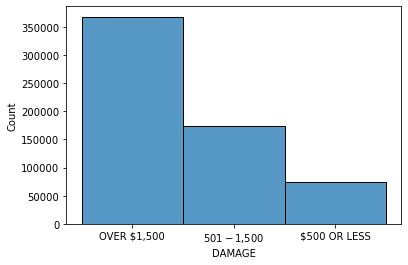

In [10]:
#create plot to show distribution of damage categories 
sns.histplot(crash_df['DAMAGE'])


### Import, explore, and clean "People" Data

In [11]:
#import People DataFrame 
people_df = pd.read_csv('data/Traffic_Crashes_-_People.csv')

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (20,24,25,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
#people_df

In [13]:
#people_df.info()

In [14]:
#Drop irrelevant columns
people_df.drop(['RD_NO', 'CRASH_DATE', 'SEAT_NO','CITY','STATE','ZIPCODE','DRIVERS_LICENSE_STATE','DRIVERS_LICENSE_CLASS','EJECTION','INJURY_CLASSIFICATION','HOSPITAL','EMS_AGENCY','EMS_RUN_NO','PEDPEDAL_ACTION','PEDPEDAL_VISIBILITY','PEDPEDAL_LOCATION','BAC_RESULT','BAC_RESULT VALUE','CELL_PHONE_USE'], axis=1, inplace=True)

In [15]:
#Remove nulls from relevant rows 
people_df.dropna(subset=["VEHICLE_ID"], inplace=True)
people_df.dropna(subset=["SEX"], inplace=True)
people_df.dropna(subset=["SAFETY_EQUIPMENT"], inplace=True)
people_df.dropna(subset=["AIRBAG_DEPLOYED"], inplace=True)
people_df.dropna(subset=["DRIVER_ACTION"], inplace=True)
people_df.dropna(subset=["DRIVER_VISION"], inplace=True)
people_df.dropna(subset=["PHYSICAL_CONDITION"], inplace=True)
people_df.dropna(subset=["AGE"], inplace=True)

In [16]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777348 entries, 0 to 1364184
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PERSON_ID           777348 non-null  object 
 1   PERSON_TYPE         777348 non-null  object 
 2   CRASH_RECORD_ID     777348 non-null  object 
 3   VEHICLE_ID          777348 non-null  float64
 4   SEX                 777348 non-null  object 
 5   AGE                 777348 non-null  float64
 6   SAFETY_EQUIPMENT    777348 non-null  object 
 7   AIRBAG_DEPLOYED     777348 non-null  object 
 8   DRIVER_ACTION       777348 non-null  object 
 9   DRIVER_VISION       777348 non-null  object 
 10  PHYSICAL_CONDITION  777348 non-null  object 
dtypes: float64(2), object(9)
memory usage: 71.2+ MB


### Import, explore, and clean "Car" Data

In [17]:
car_df = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv')

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
#car_df

In [19]:
#car_df.info()

In [20]:
#Create new Car DataFrame with only relevant columns 
clean_car_df = car_df[['CRASH_RECORD_ID','UNIT_TYPE','MAKE','MODEL','VEHICLE_YEAR','VEHICLE_DEFECT','VEHICLE_TYPE','VEHICLE_USE','MANEUVER', 'TOWED_I','EXCEED_SPEED_LIMIT_I']]

In [21]:
#clean_car_df

In [22]:
#clean_car_df.info()

In [23]:
#drop nulls 
clean_car_df.dropna(subset=["UNIT_TYPE"], inplace=True)
clean_car_df.dropna(subset=["MAKE"], inplace=True)
clean_car_df.dropna(subset=["MODEL"], inplace=True)
clean_car_df.dropna(subset=["VEHICLE_YEAR"], inplace=True)
clean_car_df.dropna(subset=["VEHICLE_DEFECT"], inplace=True)
clean_car_df.dropna(subset=["VEHICLE_USE"], inplace=True)
clean_car_df.dropna(subset=["MANEUVER"], inplace=True)
clean_car_df["TOWED_I"].fillna("Unknown", inplace=True)
clean_car_df["EXCEED_SPEED_LIMIT_I"].fillna("Unknown", inplace=True)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
clean_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035864 entries, 0 to 1266485
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1035864 non-null  object 
 1   UNIT_TYPE             1035864 non-null  object 
 2   MAKE                  1035864 non-null  object 
 3   MODEL                 1035864 non-null  object 
 4   VEHICLE_YEAR          1035864 non-null  float64
 5   VEHICLE_DEFECT        1035864 non-null  object 
 6   VEHICLE_TYPE          1035864 non-null  object 
 7   VEHICLE_USE           1035864 non-null  object 
 8   MANEUVER              1035864 non-null  object 
 9   TOWED_I               1035864 non-null  object 
 10  EXCEED_SPEED_LIMIT_I  1035864 non-null  object 
dtypes: float64(1), object(10)
memory usage: 94.8+ MB


### Merge Crash, People, and Car Data

In [25]:
#merge crash data and people data 
crash_people_df = pd.merge(crash_df,people_df, how='left',left_on = 'CRASH_RECORD_ID', right_on = "CRASH_RECORD_ID", indicator=True)

#remove duplicates 
crash_people_df.drop_duplicates(subset = 'CRASH_RECORD_ID', inplace = True)

In [26]:
#rename '_merge' column to 'Check', necessary for second merge 
crash_people_df.rename(columns = {'_merge':'Check'}, inplace = True)

In [27]:
#merge crash and people, and car DataFrames together(CPC) 
cpc_df = pd.merge(crash_people_df, clean_car_df, how='left',left_on = 'CRASH_RECORD_ID', right_on = "CRASH_RECORD_ID", indicator=True)

#drop duplicates 
cpc_df.drop_duplicates(subset = 'CRASH_RECORD_ID', inplace = True)

####  Explore and clean new DataFrame

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
cpc_df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,PERSON_ID,PERSON_TYPE,VEHICLE_ID,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,Check,UNIT_TYPE,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,TOWED_I,EXCEED_SPEED_LIMIT_I,_merge
0,0001dc2c34878baec9b7223e7ead101e0487e2e994c977...,04/27/2022 09:30:00 AM,20,CLEAR,DAYLIGHT,ANGLE,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,"OVER $1,500",UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,0.0,9,4,4,O1324770,DRIVER,1258370.0,M,24.0,USAGE UNKNOWN,DID NOT DEPLOY,UNKNOWN,UNKNOWN,NORMAL,both,DRIVER,TOYOTA,RAV4,2007.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,Unknown,Unknown,both
2,00554edcbf68c6eb4d438e92ce71a593e858971fd885a4...,05/03/2022 06:40:00 AM,15,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,WET,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,3,NO INDICATION OF INJURY,0.0,6,3,5,O1328703,DRIVER,1262176.0,F,20.0,SAFETY BELT USED,DID NOT DEPLOY,FAILED TO YIELD,UNKNOWN,NORMAL,both,DRIVER,NISSAN,VERSA,2007.0,NONE,PASSENGER,PERSONAL,ENTERING TRAFFIC LANE FROM PARKING,Y,Unknown,both
5,01143c127253f877ec850422012fae34b6b0e58bf678ae...,08/19/2020 09:30:00 AM,25,CLEAR,DAYLIGHT,ANGLE,DRY,NO INJURY / DRIVE AWAY,Unknown,Y,Unknown,"OVER $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,9,4,8,O941437,DRIVER,892450.0,M,26.0,USAGE UNKNOWN,DID NOT DEPLOY,UNKNOWN,UNKNOWN,UNKNOWN,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,00bf78dfa54ff84306859dc5d220341f1891eaf5fcf6a6...,04/20/2022 04:32:00 PM,15,CLEAR,DAYLIGHT,REAR TO FRONT,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,"OVER $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,16,4,4,O1320543,DRIVER,1254277.0,M,30.0,USAGE UNKNOWN,DID NOT DEPLOY,IMPROPER BACKING,UNKNOWN,UNKNOWN,both,DRIVER,JEEP,COMPASS,2012.0,WINDOWS,SPORT UTILITY VEHICLE (SUV),PERSONAL,BACKING,Unknown,Unknown,both
8,0161c604b1fd2e187d5f4239be87a8b2d8be36b193f01b...,04/27/2022 07:00:00 AM,30,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Y,"OVER $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,7,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059017,8f081a009f98c6fe3ffa5968b81d24607b38ef78da4838...,04/29/2022 04:25:00 PM,30,CLEAR,DAYLIGHT,REAR END,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Y,"OVER $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,16,6,4,O1326355,DRIVER,1260025.0,M,34.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NOT OBSCURED,NORMAL,both,DRIVER,CHEVROLET,EQUINOX,2006.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,Y,Unknown,both
1059019,a990787c46a181e9611488f24a7e8453931c9d9057206f...,05/01/2022 09:00:00 AM,30,CLOUDY/OVERCAST,DAYLIGHT,REAR END,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,"OVER $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,9,1,5,O1330192,DRIVER,1263607.0,M,36.0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,OTHER,UNKNOWN,NORMAL,both,DRIVER,MERCEDES-BENZ,OTHER (EXPLAIN IN NARRATIVE),2012.0,UNKNOWN,PASSENGER,PERSONAL,SLOW/STOP IN TRAFFIC,Unknown,Unknown,both
1059021,cf0c350753ba62e99a06f77de5947b775b9e55917bd66b...,05/05/2022 07:27:00 AM,30,CLEAR,DAYLIGHT,TURNING,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,7,5,5,O1330248,DRIVER,1263658.0,F,40.0,SAFETY BELT USED,NOT APPLICABLE,IMPROPER TURN,NOT OBSCURED,NORMAL,both,DRIVER,HONDA,CR-V,2013.0,NONE,PASSENGER,PERSONAL,TURN

In [30]:
cpc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616067 entries, 0 to 1059025
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   CRASH_RECORD_ID          616067 non-null  object  
 1   CRASH_DATE               616067 non-null  object  
 2   POSTED_SPEED_LIMIT       616067 non-null  int64   
 3   WEATHER_CONDITION        616067 non-null  object  
 4   LIGHTING_CONDITION       616067 non-null  object  
 5   FIRST_CRASH_TYPE         616067 non-null  object  
 6   ROADWAY_SURFACE_COND     616067 non-null  object  
 7   CRASH_TYPE               616067 non-null  object  
 8   INTERSECTION_RELATED_I   616067 non-null  object  
 9   NOT_RIGHT_OF_WAY_I       616067 non-null  object  
 10  HIT_AND_RUN_I            616067 non-null  object  
 11  DAMAGE                   616067 non-null  object  
 12  PRIM_CONTRIBUTORY_CAUSE  616067 non-null  object  
 13  NUM_UNITS                616067 non-null  i

We predicted that the make of the car could be would be, to some extent, correlated with the cost of the repairs.  You would image the repairs for fender-bender on a Rolls-Royce would be far more expensive than, say, a Toyota.

That being said, we also knew that we would have to OneHotEncode(OHE) every single make(which would've been several hundred new features), so we decided to just OHE the most popular 150 makes. 

Further, the Car-Model could've been even more valuable, but without more time we didn't think we could create an efficient model adding that many more features. As you can imgaine, nearly every car model built under the sun was on that list. 

In [31]:
#create a new column with only the 150 most occuring "Makes", and an 'Other' 
TOP_MAKES = cpc_df['MAKE'].value_counts()
threshold = 150
cpc_df['TOP_MAKES'] = np.where(cpc_df['MAKE'].isin(TOP_MAKES.index[TOP_MAKES >= threshold ]), cpc_df['MAKE'], 'other')

Text(0.5, 1.0, 'Cost Of Repair For Car Crashes')

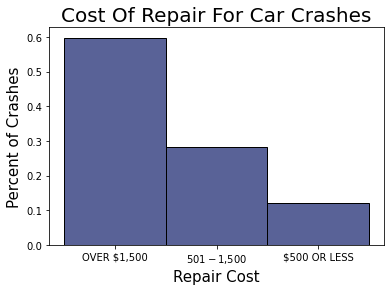

In [32]:
#create plot for damage density 
damage_density = sns.histplot(crash_df['DAMAGE'], stat = 'density', color = '#212d74')
damage_density.set_xlabel("Repair Cost", fontsize = 15)
damage_density.set_ylabel("Percent of Crashes", fontsize = 15)
damage_density.set_title("Cost Of Repair For Car Crashes", fontsize = 20)

Here we see an pretty imbalanced distribution within our target feature. In order to make these more even, we decided to combine the two lowest categories into one. 

In [33]:
#Use map function to create a binary target column 
#This helps to create more balanced dataset 
map = {"OVER $1,500":1,"$501 - $1,500": 0, "$500 OR LESS": 0}

cpc_df["Target"] = cpc_df["DAMAGE"].map(map)

In [34]:
#check for balanced dataset
#check to see the number of "events" vs "non-events" or most frequent outcome 
cpc_df["Target"].value_counts(normalize=True)

1    0.597682
0    0.402318
Name: Target, dtype: float64

Here, we see that an "event" (1)("over $1,500") occurs about 60% of the time.


In [37]:
#cpc_df.info()

In [38]:
#drop irrelevant columns 
cpc_df.drop(['PERSON_ID','CRASH_RECORD_ID','DAMAGE','CRASH_DATE','PERSON_TYPE', 'VEHICLE_ID','SAFETY_EQUIPMENT','DRIVER_VISION','Check','_merge','MODEL','MAKE','VEHICLE_DEFECT','VEHICLE_USE','EXCEED_SPEED_LIMIT_I'], axis=1, inplace=True)

KeyError: "['PERSON_ID' 'CRASH_RECORD_ID' 'DAMAGE' 'CRASH_DATE' 'PERSON_TYPE'\n 'VEHICLE_ID' 'SAFETY_EQUIPMENT' 'DRIVER_VISION' 'Check' '_merge' 'MODEL'\n 'MAKE' 'VEHICLE_DEFECT' 'VEHICLE_USE' 'EXCEED_SPEED_LIMIT_I'] not found in axis"

In [40]:
#drop nulls 
cpc_df.dropna(subset=["SEX"], inplace=True)
cpc_df.dropna(subset=["VEHICLE_YEAR"], inplace=True)

In [41]:
cpc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481160 entries, 0 to 1059025
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       481160 non-null  int64  
 1   WEATHER_CONDITION        481160 non-null  object 
 2   LIGHTING_CONDITION       481160 non-null  object 
 3   FIRST_CRASH_TYPE         481160 non-null  object 
 4   ROADWAY_SURFACE_COND     481160 non-null  object 
 5   CRASH_TYPE               481160 non-null  object 
 6   INTERSECTION_RELATED_I   481160 non-null  object 
 7   NOT_RIGHT_OF_WAY_I       481160 non-null  object 
 8   HIT_AND_RUN_I            481160 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  481160 non-null  object 
 10  NUM_UNITS                481160 non-null  int64  
 11  MOST_SEVERE_INJURY       481160 non-null  object 
 12  INJURIES_INCAPACITATING  481160 non-null  float64
 13  CRASH_HOUR               481160 non-null  int64  
 14  CRA

In [42]:
high_cost_df =  cpc_df[cpc_df['Target'] == 1]
low_cost_df = cpc_df[cpc_df['Target'] == 0]

<AxesSubplot:xlabel='PRIM_CONTRIBUTORY_CAUSE', ylabel='Count'>

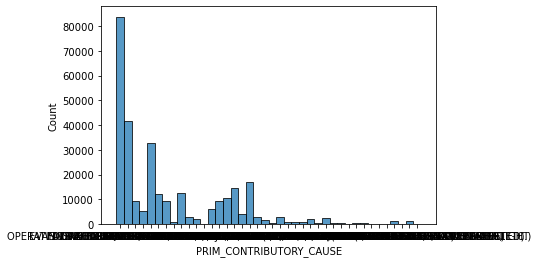

In [43]:
#visualize primary contributing causes 
sns.histplot(high_cost_df['PRIM_CONTRIBUTORY_CAUSE'])


In [44]:
high_cost_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()


UNABLE TO DETERMINE                                                                 83866
FAILING TO YIELD RIGHT-OF-WAY                                                       41801
FOLLOWING TOO CLOSELY                                                               32794
FAILING TO REDUCE SPEED TO AVOID CRASH                                              16974
IMPROPER OVERTAKING/PASSING                                                         14369
IMPROPER TURNING/NO SIGNAL                                                          12365
IMPROPER LANE USAGE                                                                 11962
NOT APPLICABLE                                                                      10547
DISREGARDING TRAFFIC SIGNALS                                                         9439
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  9377
IMPROPER BACKING                                                                     9086
WEATHER   

In [45]:
top_5_low = low_cost_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True)[1:6]


In [46]:
top_5_high = high_cost_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True)[1:6]
top_5_high

FAILING TO YIELD RIGHT-OF-WAY             0.143315
FOLLOWING TOO CLOSELY                     0.112434
FAILING TO REDUCE SPEED TO AVOID CRASH    0.058195
IMPROPER OVERTAKING/PASSING               0.049264
IMPROPER TURNING/NO SIGNAL                0.042393
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

<AxesSubplot:title={'center':'Top 5 Primary Cause for High Cost Accidents'}>

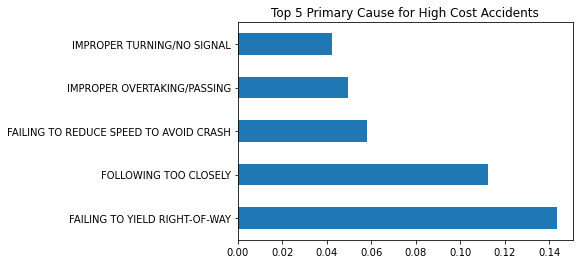

In [47]:
top_5_high.plot(kind = 'barh', title = "Top 5 Primary Cause for High Cost Accidents")


Looking at the top 5 primary causes for high cost and low cost accidnets.

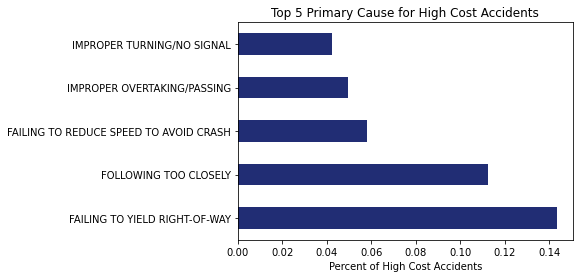

In [50]:
ax = top_5_high.plot(kind = 'barh', title = "Top 5 Primary Cause for High Cost Accidents", color = '#212d74')
ax.set_xlabel("Percent of High Cost Accidents")
patches, labels = ax.get_legend_handles_labels()

Text(0.5, 0, 'Percent of Low Cost Accidents')

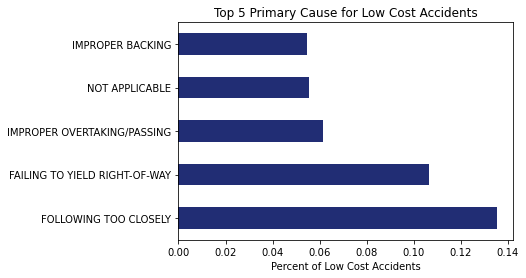

In [51]:
ax = top_5_low.plot(kind = 'barh', title = "Top 5 Primary Cause for Low Cost Accidents", color = '#212d74')
ax.set_xlabel("Percent of Low Cost Accidents")

## Modeling 

#### Test Train Split 


In [52]:
#create a numeric feature dataframe 
#perform test train split 

numeric_df = cpc_df[['POSTED_SPEED_LIMIT','NUM_UNITS','INJURIES_INCAPACITATING',
                     'CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','AGE',
                     'VEHICLE_YEAR', 'Target']]
X = numeric_df.drop("Target", axis=1)
y = numeric_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

## 1st Model - "Dummy Model" (Baseline)

This model will predict the most frequent class for every observation. In other words, our model will "guess" the target that occurs most often. This will be a good baseline to compare future models against. 

In [53]:
#instantiate dummy model 
dummy_model = DummyClassifier(strategy="most_frequent")

In [54]:
#fit model 
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [55]:
dummy_model.predict(y_train)[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

Here we see that guessing the most frequent event (1) every time, our model will be correct about 60% of the time(as this is the proportion of events(1) to nonevents(0). 

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


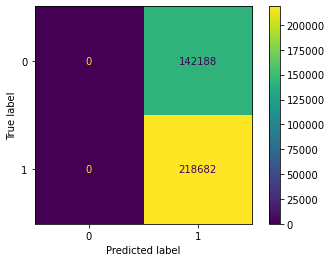

In [56]:
#create confusion matrix 
plot_confusion_matrix(dummy_model, X_train, y_train)

### Model Evaluation 

#### Cross-validation will allow us to see how the model would do in generalizing to new data it's never seen.

In [57]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.60599385, 0.60599385, 0.60597999, 0.60597999, 0.60597999])

As we predicted, our model was correct approximately 60% of the time. 


To show the spread, we'll make a convenient class that can help us organize the model and the cross-validation:

In [58]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [59]:
dummy_model_results = ModelWithCV(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
)

CV Results for `dummy` model:
            0.60599 ± 0.00001 accuracy
        


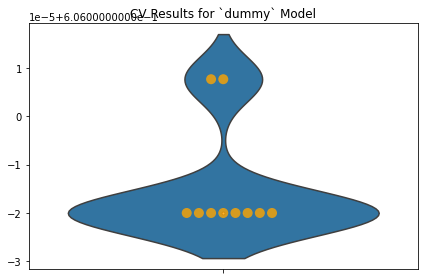

In [60]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


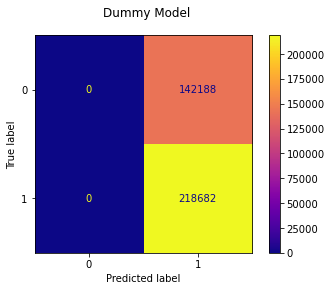

In [61]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [62]:
from sklearn.metrics import accuracy_score

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


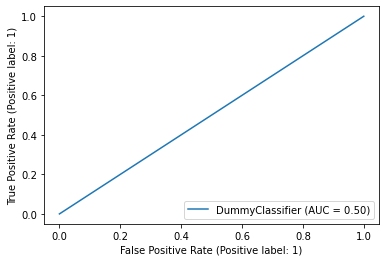

In [63]:
plot_roc_curve(dummy_model, X_train, y_train);

## 2nd Model - Logistic Regression 

Next we will create a logistic regression model and compare its performance.

We're going to specifically avoid any regularization (the default) to see how the model does with little change. Set penalty paramter = 'none'  =  no regularization. 

In [64]:
#setting penalty = none means there is no regulaization, and thus we will not scale it 
simple_logreg_model = LogisticRegression(random_state=2021, penalty='none') 

In [65]:
#fit model and then predict 
simple_logreg_model.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=2021)

In [66]:
simple_logreg_model.predict(X_train)[200000:200050]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

Looking at 50 random samples, we see a mix of events and non-events this time. 

###  2nd Model - Model Evaluation

In [67]:
simple_logreg_results = ModelWithCV(
                        model=simple_logreg_model,
                        model_name='simple_logreg',
                        X=X_train, 
                        y=y_train
)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

CV Results for `simple_logreg` model:
            0.60018 ± 0.00104 accuracy
        


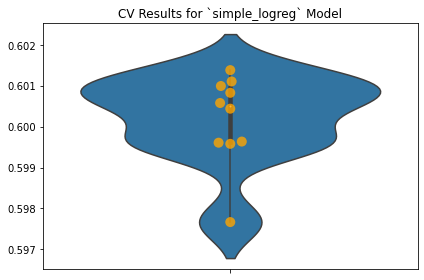

In [68]:
# Saving variable for convenience
model_results = simple_logreg_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

We see that with no regularization and default parameters, the model performs nearly the same as our basline model.  

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


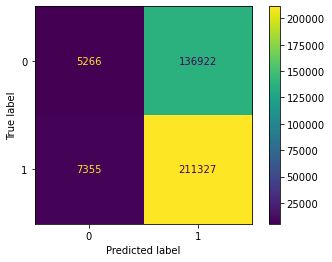

In [69]:
plot_confusion_matrix(simple_logreg_model, X_train, y_train)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


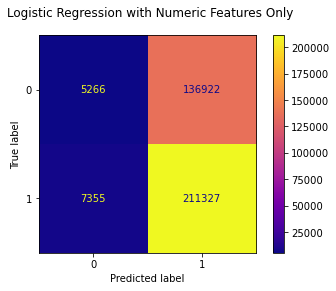

In [70]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression with Numeric Features Only")

plot_confusion_matrix(simple_logreg_model, X_train, y_train, ax=ax, cmap="plasma");

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


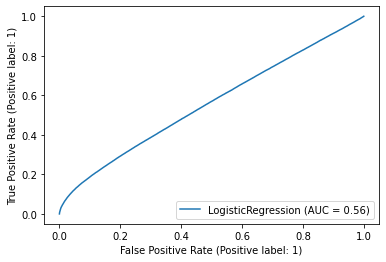

In [71]:
plot_roc_curve(simple_logreg_model, X_train, y_train);

BUT, our ROC has improved. Our ROC curve now has an AUC of 0.56. This is better than our original model, but still not great. We hope by adding in more data preparation and feature engineering we can increase this more. 

## More Data Preparation 

This time we performed a train-test split that contains all of the features.


In [161]:
X = cpc_df.drop("Target", axis=1)
y = cpc_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

### Handling Missing Values


In [162]:
indicator_demo = MissingIndicator()

indicator_demo.fit(X_train)

indicator_demo.features_

array([], dtype=int64)

In [163]:
indicator_demo.transform(X_train)[:5, :]

array([], shape=(5, 0), dtype=bool)

In [164]:
# belowcreates a missing indicator column to help us see if something is
#missing a value for a partiucal
#column, --- NOT NECESSARY 

#what is essential !! is an imputer!! 
indicator = MissingIndicator(features="all")
indicator.fit(X_train)

MissingIndicator(features='all')

In [165]:
def add_missing_indicator_columns(X, indicator):
    """
    Helper function for transforming features
    
    For every feature in X, create another feature indicating whether that feature
    is missing. (This doubles the number of columns in X.)
    """
    
    # create a 2D array of True and False values indicating whether a given feature
    # is missing for that row
    missing_array_bool = indicator.transform(X)
    
    # transform into 1 and 0 for modeling
    missing_array_int = missing_array_bool.astype(int)
    
    # helpful for readability but not needed for modeling
    missing_column_names = [col + "_missing" for col in X.columns]
    
    # convert to df so it we can concat with X
    missing_df = pd.DataFrame(missing_array_int, columns=missing_column_names, index=X.index)
    
    return pd.concat([X, missing_df], axis=1)

In [166]:
X_train = add_missing_indicator_columns(X=X_train, indicator=indicator)

In [167]:
X_train.head()

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,SEX,AGE,AIRBAG_DEPLOYED,DRIVER_ACTION,PHYSICAL_CONDITION,UNIT_TYPE,VEHICLE_YEAR,VEHICLE_TYPE,MANEUVER,TOWED_I,TOP_MAKES,POSTED_SPEED_LIMIT_missing,WEATHER_CONDITION_missing,LIGHTING_CONDITION_missing,FIRST_CRASH_TYPE_missing,ROADWAY_SURFACE_COND_missing,CRASH_TYPE_missing,INTERSECTION_RELATED_I_missing,NOT_RIGHT_OF_WAY_I_missing,HIT_AND_RUN_I_missing,PRIM_CONTRIBUTORY_CAUSE_missing,NUM_UNITS_missing,MOST_SEVERE_INJURY_missing,INJURIES_INCAPACITATING_missing,CRASH_HOUR_missing,CRASH_DAY_OF_WEEK_missing,CRASH_MONTH_missing,SEX_missing,AGE_missing,AIRBAG_DEPLOYED_missing,DRIVER_ACTION_missing,PHYSICAL_CONDITION_missing,UNIT_TYPE_missing,VEHICLE_YEAR_missing,VEHICLE_TYPE_missing,MANEUVER_missing,TOWED_I_missing,TOP_MAKES_missing
768726,30,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,IMPROPER LANE USAGE,2,NO INDICATION OF INJURY,0.0,8,5,5,M,48.0,DID NOT DEPLOY,IMPROPER LANE CHANGE,NORMAL,DRIVER,2013.0,OTHER,PASSING/OVERTAKING,Unknown,"TOYOTA MOTOR COMPANY, LTD.",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
540193,30,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,NOT APPLICABLE,2,NO INDICATION OF INJURY,0.0,12,7,8,M,61.0,DID NOT DEPLOY,NONE,NORMAL,DRIVER,2017.0,PASSENGER,STRAIGHT AHEAD,Unknown,KIA MOTORS CORP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
710940,35,CLEAR,DUSK,SIDESWIPE SAME DIRECTION,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,19,6,3,F,74.0,DEPLOYMENT UNKNOWN,UNKNOWN,NORMAL,DRIVER,1999.0,PASSENGER,STRAIGHT AHEAD,Unknown,"TOYOTA MOTOR COMPANY, LTD.",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581887,30,UNKNOWN,UNKNOWN,REAR END,UNKNOWN,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,15,2,6,F,71.0,DID NOT DEPLOY,UNKNOWN,UNKNOWN,DRIVER,2017.0,PASSENGER,UNKNOWN/NA,Unknown,SUBARU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
420201,30,CLEAR,DAYLIGHT,REAR END,WET,NO INJURY / DRIVE AWAY,Unknown,Y,Unknown,IMPROPER BACKING,2,NO INDICATION OF INJURY,0.0,11,3,1,F,24.0,DID NOT DEPLOY,IMPROPER BACKING,NORMAL,DRIVER,2005.0,PASSENGER,BACKING,Unknown,HONDA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
#seperate into numeric and categ. features 
numeric_feature_names = ['POSTED_SPEED_LIMIT','NUM_UNITS','INJURIES_INCAPACITATING',
                           'CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','AGE','VEHICLE_YEAR']
categorical_feature_names = [c for c in cpc_df.columns if cpc_df[c].dtype == "O"]

X_train_numeric = X_train[numeric_feature_names]
X_train_categorical = X_train[categorical_feature_names]

In [169]:
#imputing numeric columns using the mean for imputing, bc that is the default..would need to specify otherwise 
numeric_imputer = SimpleImputer()
numeric_imputer.fit(X_train_numeric)

SimpleImputer()

In [170]:
categorical_imputer = SimpleImputer(strategy="most_frequent") #here, we imputed using most freq for categorical vars.
categorical_imputer.fit(X_train_categorical)

SimpleImputer(strategy='most_frequent')

In [171]:
def impute_missing_values(X, imputer):
    """
    Given a DataFrame and an imputer, use the imputer to fill in all
    missing values in the DataFrame
    """
    imputed_array = imputer.transform(X)
    imputed_df = pd.DataFrame(imputed_array, columns=X.columns, index=X.index)
    return imputed_df

In [172]:
X_train_numeric = impute_missing_values(X_train_numeric, numeric_imputer)
X_train_categorical = impute_missing_values(X_train_categorical, categorical_imputer)

In [173]:
X_train_imputed = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_train_imputed.isna().sum()

POSTED_SPEED_LIMIT         0
NUM_UNITS                  0
INJURIES_INCAPACITATING    0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
AGE                        0
VEHICLE_YEAR               0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
ROADWAY_SURFACE_COND       0
CRASH_TYPE                 0
INTERSECTION_RELATED_I     0
NOT_RIGHT_OF_WAY_I         0
HIT_AND_RUN_I              0
PRIM_CONTRIBUTORY_CAUSE    0
MOST_SEVERE_INJURY         0
SEX                        0
AIRBAG_DEPLOYED            0
DRIVER_ACTION              0
PHYSICAL_CONDITION         0
UNIT_TYPE                  0
VEHICLE_TYPE               0
MANEUVER                   0
TOWED_I                    0
TOP_MAKES                  0
dtype: int64

In [174]:
X_train = X_train.drop(numeric_feature_names + categorical_feature_names, axis=1)
X_train = pd.concat([X_train_imputed, X_train], axis=1)

In [73]:
X_train.columns

Index(['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'ROADWAY_SURFACE_COND', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_INCAPACITATING', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'SEX', 'AGE', 'AIRBAG_DEPLOYED', 'DRIVER_ACTION',
       'PHYSICAL_CONDITION', 'UNIT_TYPE', 'VEHICLE_YEAR', 'VEHICLE_TYPE',
       'MANEUVER', 'TOWED_I', 'TOP_MAKES'],
      dtype='object')

In [74]:
#confirmed there were no null values before OneHotEncoding
X_train.isna().sum()

POSTED_SPEED_LIMIT         0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
ROADWAY_SURFACE_COND       0
CRASH_TYPE                 0
INTERSECTION_RELATED_I     0
NOT_RIGHT_OF_WAY_I         0
HIT_AND_RUN_I              0
PRIM_CONTRIBUTORY_CAUSE    0
NUM_UNITS                  0
MOST_SEVERE_INJURY         0
INJURIES_INCAPACITATING    0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
SEX                        0
AGE                        0
AIRBAG_DEPLOYED            0
DRIVER_ACTION              0
PHYSICAL_CONDITION         0
UNIT_TYPE                  0
VEHICLE_YEAR               0
VEHICLE_TYPE               0
MANEUVER                   0
TOWED_I                    0
TOP_MAKES                  0
dtype: int64

### One Hot Encode

In [75]:
X = cpc_df.drop(columns='Target')
y = cpc_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [76]:
categorical_feature_names = [c for c in cpc_df.columns if cpc_df[c].dtype == "O"]
numerical_feature_names = ['POSTED_SPEED_LIMIT','NUM_UNITS','INJURIES_INCAPACITATING',
                           'CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','AGE','VEHICLE_YEAR']

In [77]:

def encode_and_concat_feature_train(X_train, feature_name):
    """
    Helper function for transforming training data.  It takes in the full X dataframe and
    feature name, makes a one-hot encoder, and returns the encoder as well as the dataframe
    with that feature transformed into multiple columns of 1s and 0s
    """
    # make a one-hot encoder and fit it to the training data
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    single_feature_df = X_train[[feature_name]]
    ohe.fit(single_feature_df)
    
    # call helper function that actually encodes the feature and concats it
    X_train = encode_and_concat_feature(X_train, feature_name, ohe)
    
    return ohe, X_train

In [78]:

def encode_and_concat_feature(X, feature_name, ohe):
    """
    Helper function for transforming a feature into multiple columns of 1s and 0s. Used
    in both training and testing steps.  Takes in the full X dataframe, feature name, 
    and encoder, and returns the dataframe with that feature transformed into multiple
    columns of 1s and 0s
    """
    # create new one-hot encoded df based on the feature
    single_feature_df = X[[feature_name]]
    feature_array = ohe.transform(single_feature_df).toarray()
    ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0], index=X.index)
    
    # drop the old feature from X and concat the new one-hot encoded df
    X = X.drop(feature_name, axis=1)
    X = pd.concat([X, ohe_df], axis=1)
    
    return X

In [79]:
encoders = {}

for categorical_feature in categorical_feature_names:
    ohe, X_train = encode_and_concat_feature_train(X_train, categorical_feature)
    encoders[categorical_feature] = ohe

In [80]:
encoders

{'WEATHER_CONDITION': OneHotEncoder(handle_unknown='ignore'),
 'LIGHTING_CONDITION': OneHotEncoder(handle_unknown='ignore'),
 'FIRST_CRASH_TYPE': OneHotEncoder(handle_unknown='ignore'),
 'ROADWAY_SURFACE_COND': OneHotEncoder(handle_unknown='ignore'),
 'CRASH_TYPE': OneHotEncoder(handle_unknown='ignore'),
 'INTERSECTION_RELATED_I': OneHotEncoder(handle_unknown='ignore'),
 'NOT_RIGHT_OF_WAY_I': OneHotEncoder(handle_unknown='ignore'),
 'HIT_AND_RUN_I': OneHotEncoder(handle_unknown='ignore'),
 'PRIM_CONTRIBUTORY_CAUSE': OneHotEncoder(handle_unknown='ignore'),
 'MOST_SEVERE_INJURY': OneHotEncoder(handle_unknown='ignore'),
 'SEX': OneHotEncoder(handle_unknown='ignore'),
 'AIRBAG_DEPLOYED': OneHotEncoder(handle_unknown='ignore'),
 'DRIVER_ACTION': OneHotEncoder(handle_unknown='ignore'),
 'PHYSICAL_CONDITION': OneHotEncoder(handle_unknown='ignore'),
 'UNIT_TYPE': OneHotEncoder(handle_unknown='ignore'),
 'VEHICLE_TYPE': OneHotEncoder(handle_unknown='ignore'),
 'MANEUVER': OneHotEncoder(handle_u

In [81]:
X_train.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,VEHICLE_YEAR,"BLOWING SAND, SOIL, DIRT",BLOWING SNOW,CLEAR,CLOUDY/OVERCAST,FOG/SMOKE/HAZE,FREEZING RAIN/DRIZZLE,OTHER,RAIN,SEVERE CROSS WIND GATE,SLEET/HAIL,SNOW,UNKNOWN,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN,ANGLE,ANIMAL,FIXED OBJECT,HEAD ON,OTHER NONCOLLISION,OTHER OBJECT,OVERTURNED,PARKED MOTOR VEHICLE,PEDALCYCLIST,PEDESTRIAN,REAR END,REAR TO FRONT,REAR TO REAR,REAR TO SIDE,SIDESWIPE OPPOSITE DIRECTION,SIDESWIPE SAME DIRECTION,TRAIN,TURNING,DRY,ICE,OTHER,"SAND, MUD, DIRT",SNOW OR SLUSH,UNKNOWN,WET,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,N,Unknown,Y,N,Unknown,Y,N,Unknown,Y,ANIMAL,BICYCLE ADVANCING LEGALLY ON RED LIGHT,CELL PHONE USE OTHER THAN TEXTING,DISREGARDING OTHER TRAFFIC SIGNS,DISREGARDING ROAD MARKINGS,DISREGARDING STOP SIGN,DISREGARDING TRAFFIC SIGNALS,DISREGARDING YIELD SIGN,DISTRACTION - FROM INSIDE VEHICLE,DISTRACTION - FROM OUTSIDE VEHICLE,"DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",DRIVING ON WRONG SIDE/WRONG WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,EQUIPMENT - VEHICLE CONDITION,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",EXCEEDING AUTHORIZED SPEED LIMIT,EXCEEDING SAFE SPEED FOR CONDITIONS,FAILING TO REDUCE SPEED TO AVOID CRASH,FAILING TO YIELD RIGHT-OF-WAY,FOLLOWING TOO CLOSELY,HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),IMPROPER BACKING,IMPROPER LANE USAGE,IMPROPER OVERTAKING/PASSING,IMPROPER TURNING/NO SIGNAL,MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,NOT APPLICABLE,OBSTRUCTED CROSSWALKS,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PASSING STOPPED SCHOOL BUS,PHYSICAL CONDITION OF DRIVER,RELATED TO BUS STOP,ROAD CONSTRUCTION/MAINTENANCE,ROAD ENGINEERING/SURFACE/MARKING DEFECTS,TEXTING,TURNING RIGHT ON RED,UNABLE TO DETERMINE,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",WEATHER,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",F,M,X,"DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)","DEPLOYED, COMBINATION","DEPLOYED, FRONT","DEPLOYED, SIDE",DEPLOYMENT UNKNOWN,DID NOT DEPLOY,NOT APPLICABLE,CELL PHONE USE OTHER THAN TEXTING,DISREGARDED CONTROL DEVICES,EMERGENCY VEHICLE ON CALL,EVADING POLICE VEHICLE,FAILED TO YIELD,FOLLOWED TOO CLOSELY,IMPROPER BACKING,IMPROPER LANE CHANGE,IMPROPER PARKING,IMPROPER PASSING,IMPROPER TURN,LICENSE RESTRICTIONS,NONE,OTHER,OVERCORRECTED,STOPPED SCHOOL BUS,TEXTING,TOO FAST FOR CONDITIONS,UNKNOWN,WRONG WAY/SIDE,EMOTIONAL,FATIGUED/ASLEEP,HAD BEEN DRINKING,ILLNESS/FAINTED,IMPAIRED - ALCOHOL,IMPAIRED - ALCOHOL AND DRUGS,IMPAIRED - DRUGS,MEDICATED,NORMAL,OTHER,REMOVED BY EMS,UNKNOWN,DISABLED VEHICLE,DRIVER,DRIVERLESS,NON-CONTACT VEHICLE,PARKED,3-WHEELED MOTORCYCLE (2 REAR WHEELS),ALL-TERRAIN VEHICLE (ATV),AUTOCYCLE,BUS OVER 15 PASS.,BUS UP TO 15 PASS.,FARM EQUIPMENT,MOPED OR MOTORIZED BICYCLE,MOTOR DRIVEN CYCLE,MOTORCYCLE (OVER 150CC),OTHER,OTHER VEHICLE WITH TRAILER,PASSENGER,PICKUP,RECREATIONAL OFF-HIGHWAY VEHICLE (ROV),SINGLE UNIT TRUCK WITH TRAILER,SPORT UTILITY VEHICLE (SUV),TRACTOR W/ SEMI-TRAILER,TRACTOR W/O SEMI-TRAILER,TRUCK - SINGLE UNIT,UNKNOWN/NA,VAN/MINI-VAN,AVOIDING VEHICLES/OBJECTS,BACKING,CHANGING LANES,DISABLED,DIVERGING,DRIVERLESS,DRIVING WRONG WAY,ENTER FROM DRIVE/ALLEY,ENTERING TRAFFIC LANE FROM PARKING,LEAVING TRAFFIC LANE TO PARK,MERGING,NEGOTIATING A CURVE,OTHER,PARKED,PARKED IN TRAFFIC LANE,PASSING/OVERTAKING,SKIDDING/CONTROL LOSS,SLOW/STOP - LEFT TURN,SLOW/STOP - LOAD/UNLOAD,SLOW/STOP - RIGHT TURN,SLOW/STOP IN TRAFFIC,STARTING IN TRAFFIC,STRAIGHT AHEAD,TURNING LEFT,TURNING ON RED,TURNING RIGHT,U-TURN,UNKNOWN/NA,N,Unknown,Y,ACURA,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),AUDI,AUTOCAR,BLUE BIRD BODY CO.,BLUEBIRD INTERNATIONAL,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FIAT,FORD,FREIGHTLINER CORP.,FREIGHTLINER CORPORATION,GENERAL MOTORS 

In [82]:
X_train.shape

(384928, 276)

### Decision Tree - For Feature Importance

In [83]:
#Instatiate Decision Tree
dt = DecisionTreeClassifier(max_depth=13, random_state=42)

dt.fit(X_train, y_train)

CV_results = cross_val_score(dt,X_train,y_train,cv=5)
CV_results

array([0.64109059, 0.64051906, 0.64450679, 0.63734494, 0.64222901])

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


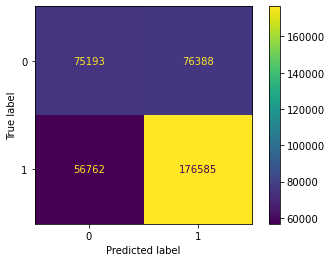

In [84]:
plot_confusion_matrix(dt,X_train,y_train)


In [88]:
#create dictionary of feature importance 
list = {}
for fi, feature in zip(dt.feature_importances_,X_train):
    list.update({fi:feature})

In [89]:
#Order by most important 
import collections
od = collections.OrderedDict(sorted(list.items(),reverse=True))
od

OrderedDict([(0.47176152114247366, 'Unknown'),
             (0.08007323742733576, 'PEDESTRIAN'),
             (0.0742960974923095, 'NO INJURY / DRIVE AWAY'),
             (0.051802317598114954, 'PEDALCYCLIST'),
             (0.026957878955472244, 'NUM_UNITS'),
             (0.02057261804965019, 'TURNING'),
             (0.019180138926079154, 'REAR END'),
             (0.018695629824756227, 'ANGLE'),
             (0.012105753872643107, 'AGE'),
             (0.011023508696458925, 'VEHICLE_YEAR'),
             (0.010863634846919464, 'POSTED_SPEED_LIMIT'),
             (0.010691562522625332, 'CRASH_HOUR'),
             (0.010491128945547455, 'DEPLOYED, FRONT'),
             (0.009527971552169757, 'BACKING'),
             (0.009491754218585273, 'NONE'),
             (0.009273813290600372, 'NOT APPLICABLE'),
             (0.009120351008439257, 'INJURY AND / OR TOW DUE TO CRASH'),
             (0.00907981623939435, 'UNABLE TO DETERMINE'),
             (0.008401370491681744, 'NO INDICATION OF 

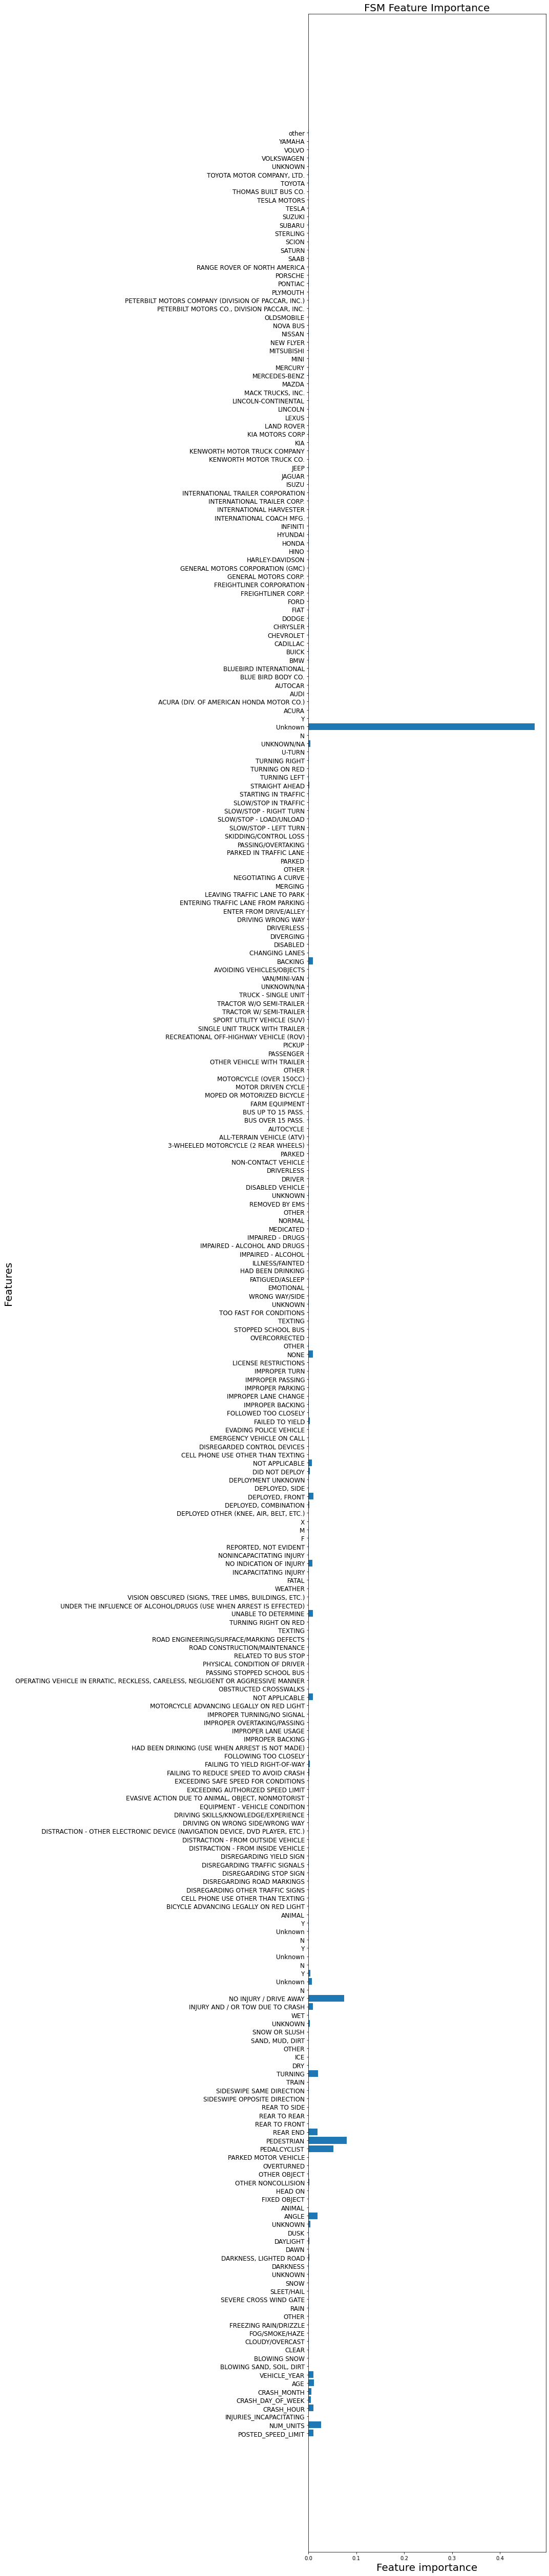

In [90]:
#visualize 
n_features = dt.n_features_
plt.figure(figsize=(15, 70))
plt.barh(range(n_features), dt.feature_importances_);
plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 12) 
plt.xlabel('Feature importance', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.title('FSM Feature Importance', fontsize = 20)
plt.tight_layout()


With more time, we would impute all of our "unknown" data and determine featuer importance again. Based on the results, we would remove the the unimportant features and focus on the most important ones. 

## "3rd Model"

In [91]:
logreg_model = LogisticRegression(random_state=2021, penalty='none')
logreg_model.fit(X_train, y_train)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=2021)

In [92]:
#more iterations
logreg_model_more_iterations = LogisticRegression(
                                                random_state=2021, 
                                                penalty='none', 
                                                max_iter=100
)
logreg_model_more_iterations.fit(X_train, y_train)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=2021)

In [93]:
#higher tolerance (C-parameter is inverse of regularization strength)
#higher tolerance means that our models will stop training earlier (when predictors and 
#true values are not as close as they could be).
logreg_model_higher_tolerance = LogisticRegression(
                                                random_state=2021, 
                                                penalty='none', 
                                                tol=25
)
logreg_model_higher_tolerance.fit(X_train, y_train)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=2021, tol=25)

## 3rd Model - Model Evaluations 

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


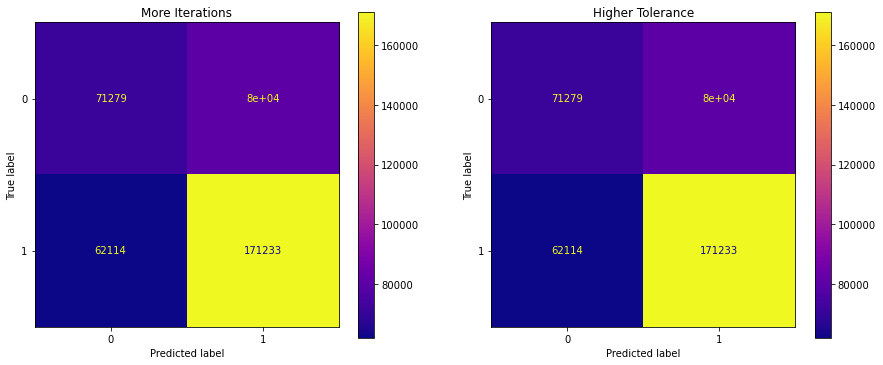

In [94]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Higher Tolerance")

plot_confusion_matrix(logreg_model_more_iterations, X_train, y_train,
                      ax=axes[0], cmap="plasma")
plot_confusion_matrix(logreg_model_higher_tolerance, X_train, y_train,
                      ax=axes[1], cmap="plasma");

In [95]:
logreg_model_more_iterations_results = ModelWithCV(
                                        logreg_model_more_iterations,
                                        'more_iterations',
                                        X_train,
                                        y_train
)
    
logreg_model_higher_tolerance_results = ModelWithCV(
                                        logreg_model_higher_tolerance,
                                        'higher_tolerance',
                                        X_train,
                                        y_train
)

model_results = [
    logreg_model_more_iterations_results,
    logreg_model_higher_tolerance_results
]

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

CV Results for `more_iterations` model:
            0.62740 ± 0.00171 accuracy
        
CV Results for `higher_tolerance` model:
            0.62740 ± 0.00171 accuracy
        


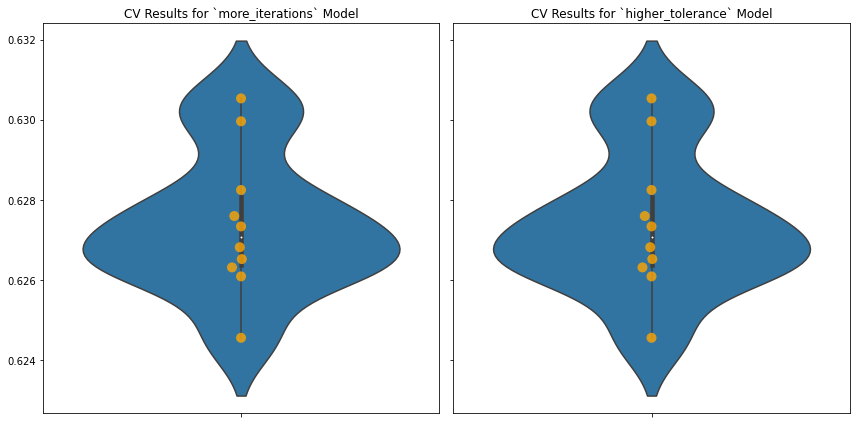

In [96]:
f,axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))

for ax, result in zip(axes, model_results):
    ax = result.plot_cv(ax)
    result.print_cv_summary()
plt.tight_layout();

Here we see a slight improvement from our previous scores. 

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


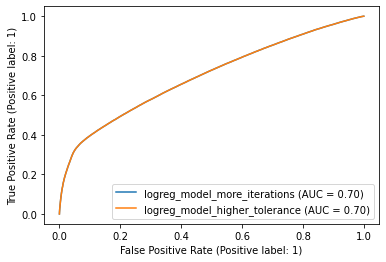

In [101]:
fig, ax = plt.subplots()

plot_roc_curve(logreg_model_more_iterations, X_train, y_train, 
               name='logreg_model_more_iterations', ax=ax)
plot_roc_curve(logreg_model_higher_tolerance, X_train, y_train, 
               name='logreg_model_higher_tolerance', ax=ax);

Here, we see a major improvememnt! Could be result of overfitting. 

# 4th Model - After Scaling

## More Data Preparation - Scaling 

In [102]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [103]:
def scale_values(X, scaler):
    """
    Given a DataFrame and a fitted scaler, use the scaler to scale all of the features
    """
    scaled_array = scaler.transform(X)
    scaled_df = pd.DataFrame(scaled_array, columns=X.columns, index=X.index)
    return scaled_df

In [104]:
X_train = scale_values(X_train, scaler)

In [105]:
X_train.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,VEHICLE_YEAR,"BLOWING SAND, SOIL, DIRT",BLOWING SNOW,CLEAR,CLOUDY/OVERCAST,FOG/SMOKE/HAZE,FREEZING RAIN/DRIZZLE,OTHER,RAIN,SEVERE CROSS WIND GATE,SLEET/HAIL,SNOW,UNKNOWN,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN,ANGLE,ANIMAL,FIXED OBJECT,HEAD ON,OTHER NONCOLLISION,OTHER OBJECT,OVERTURNED,PARKED MOTOR VEHICLE,PEDALCYCLIST,PEDESTRIAN,REAR END,REAR TO FRONT,REAR TO REAR,REAR TO SIDE,SIDESWIPE OPPOSITE DIRECTION,SIDESWIPE SAME DIRECTION,TRAIN,TURNING,DRY,ICE,OTHER,"SAND, MUD, DIRT",SNOW OR SLUSH,UNKNOWN,WET,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,N,Unknown,Y,N,Unknown,Y,N,Unknown,Y,ANIMAL,BICYCLE ADVANCING LEGALLY ON RED LIGHT,CELL PHONE USE OTHER THAN TEXTING,DISREGARDING OTHER TRAFFIC SIGNS,DISREGARDING ROAD MARKINGS,DISREGARDING STOP SIGN,DISREGARDING TRAFFIC SIGNALS,DISREGARDING YIELD SIGN,DISTRACTION - FROM INSIDE VEHICLE,DISTRACTION - FROM OUTSIDE VEHICLE,"DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",DRIVING ON WRONG SIDE/WRONG WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,EQUIPMENT - VEHICLE CONDITION,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",EXCEEDING AUTHORIZED SPEED LIMIT,EXCEEDING SAFE SPEED FOR CONDITIONS,FAILING TO REDUCE SPEED TO AVOID CRASH,FAILING TO YIELD RIGHT-OF-WAY,FOLLOWING TOO CLOSELY,HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),IMPROPER BACKING,IMPROPER LANE USAGE,IMPROPER OVERTAKING/PASSING,IMPROPER TURNING/NO SIGNAL,MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,NOT APPLICABLE,OBSTRUCTED CROSSWALKS,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PASSING STOPPED SCHOOL BUS,PHYSICAL CONDITION OF DRIVER,RELATED TO BUS STOP,ROAD CONSTRUCTION/MAINTENANCE,ROAD ENGINEERING/SURFACE/MARKING DEFECTS,TEXTING,TURNING RIGHT ON RED,UNABLE TO DETERMINE,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",WEATHER,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",F,M,X,"DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)","DEPLOYED, COMBINATION","DEPLOYED, FRONT","DEPLOYED, SIDE",DEPLOYMENT UNKNOWN,DID NOT DEPLOY,NOT APPLICABLE,CELL PHONE USE OTHER THAN TEXTING,DISREGARDED CONTROL DEVICES,EMERGENCY VEHICLE ON CALL,EVADING POLICE VEHICLE,FAILED TO YIELD,FOLLOWED TOO CLOSELY,IMPROPER BACKING,IMPROPER LANE CHANGE,IMPROPER PARKING,IMPROPER PASSING,IMPROPER TURN,LICENSE RESTRICTIONS,NONE,OTHER,OVERCORRECTED,STOPPED SCHOOL BUS,TEXTING,TOO FAST FOR CONDITIONS,UNKNOWN,WRONG WAY/SIDE,EMOTIONAL,FATIGUED/ASLEEP,HAD BEEN DRINKING,ILLNESS/FAINTED,IMPAIRED - ALCOHOL,IMPAIRED - ALCOHOL AND DRUGS,IMPAIRED - DRUGS,MEDICATED,NORMAL,OTHER,REMOVED BY EMS,UNKNOWN,DISABLED VEHICLE,DRIVER,DRIVERLESS,NON-CONTACT VEHICLE,PARKED,3-WHEELED MOTORCYCLE (2 REAR WHEELS),ALL-TERRAIN VEHICLE (ATV),AUTOCYCLE,BUS OVER 15 PASS.,BUS UP TO 15 PASS.,FARM EQUIPMENT,MOPED OR MOTORIZED BICYCLE,MOTOR DRIVEN CYCLE,MOTORCYCLE (OVER 150CC),OTHER,OTHER VEHICLE WITH TRAILER,PASSENGER,PICKUP,RECREATIONAL OFF-HIGHWAY VEHICLE (ROV),SINGLE UNIT TRUCK WITH TRAILER,SPORT UTILITY VEHICLE (SUV),TRACTOR W/ SEMI-TRAILER,TRACTOR W/O SEMI-TRAILER,TRUCK - SINGLE UNIT,UNKNOWN/NA,VAN/MINI-VAN,AVOIDING VEHICLES/OBJECTS,BACKING,CHANGING LANES,DISABLED,DIVERGING,DRIVERLESS,DRIVING WRONG WAY,ENTER FROM DRIVE/ALLEY,ENTERING TRAFFIC LANE FROM PARKING,LEAVING TRAFFIC LANE TO PARK,MERGING,NEGOTIATING A CURVE,OTHER,PARKED,PARKED IN TRAFFIC LANE,PASSING/OVERTAKING,SKIDDING/CONTROL LOSS,SLOW/STOP - LEFT TURN,SLOW/STOP - LOAD/UNLOAD,SLOW/STOP - RIGHT TURN,SLOW/STOP IN TRAFFIC,STARTING IN TRAFFIC,STRAIGHT AHEAD,TURNING LEFT,TURNING ON RED,TURNING RIGHT,U-TURN,UNKNOWN/NA,N,Unknown,Y,ACURA,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),AUDI,AUTOCAR,BLUE BIRD BODY CO.,BLUEBIRD INTERNATIONAL,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FIAT,FORD,FREIGHTLINER CORP.,FREIGHTLINER CORPORATION,GENERAL MOTORS 

Now that we have scaled data, lets see how well our logistic regression model fits without adjusting any hyperparameters. 

In [106]:
logreg_model = LogisticRegression(random_state=2021)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=2021)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


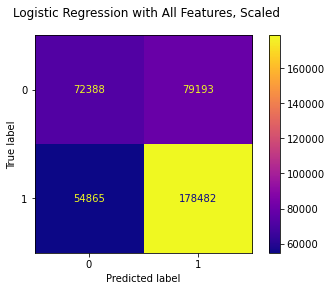

In [107]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression with All Features, Scaled")

plot_confusion_matrix(logreg_model, X_train, y_train, ax=ax, cmap="plasma");

In [108]:
all_features_results = ModelWithCV(
                            logreg_model,
                            'all_features',
                            X_train,
                            y_train
)

CV Results for `all_features` model:
            0.65079 ± 0.00143 accuracy
        


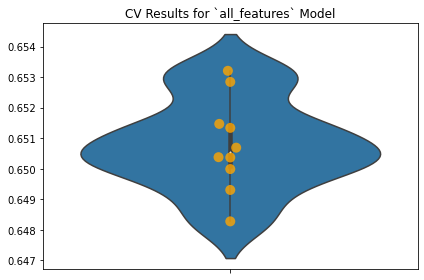

In [109]:
# Saving variable for convenience
model_results = all_features_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

We see that scaling improved our accuracy scores. We also see below that the AUC increased slightly. 

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


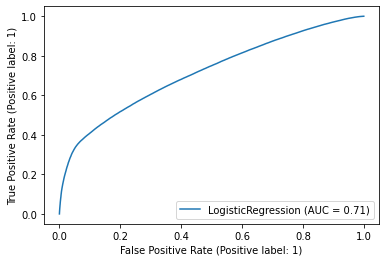

In [110]:
plot_roc_curve(logreg_model, X_train, y_train)

In [113]:
# sorted(list(zip(X_train.columns, logreg_model.coef_[0])),
#        key=lambda x: abs(x[1]), reverse=True)[:50]

In [114]:
#so now lets increase the regularization - the correct the overfitting 

## Hyperparameter Adjustment

### Different Regularization Strengths


In [115]:
all_features_results.print_cv_summary()

CV Results for `all_features` model:
            0.65079 ± 0.00143 accuracy
        


In [117]:
model_results = [all_features_results]
C_values = [0.0001, 0.001, 0.01, 0.1, 1]

for c in C_values:
    logreg_model = LogisticRegression(random_state=2021, C=c)
    logreg_model.fit(X_train, y_train)
    # Save Results
    new_model_results = ModelWithCV(
                            logreg_model,
                            f'all_features_c{c:e}',
                            X_train,
                            y_train
    )
    model_results.append(new_model_results)
    new_model_results.print_cv_summary()

CV Results for `all_features_c1.000000e-04` model:
            0.65099 ± 0.00107 accuracy
        
CV Results for `all_features_c1.000000e-03` model:
            0.65073 ± 0.00135 accuracy
        
CV Results for `all_features_c1.000000e-02` model:
            0.65073 ± 0.00141 accuracy
        
CV Results for `all_features_c1.000000e-01` model:
            0.65080 ± 0.00144 accuracy
        
CV Results for `all_features_c1.000000e+00` model:
            0.65079 ± 0.00143 accuracy
        


Here, we don't see any any significant improvement in accuracy with C-values. 

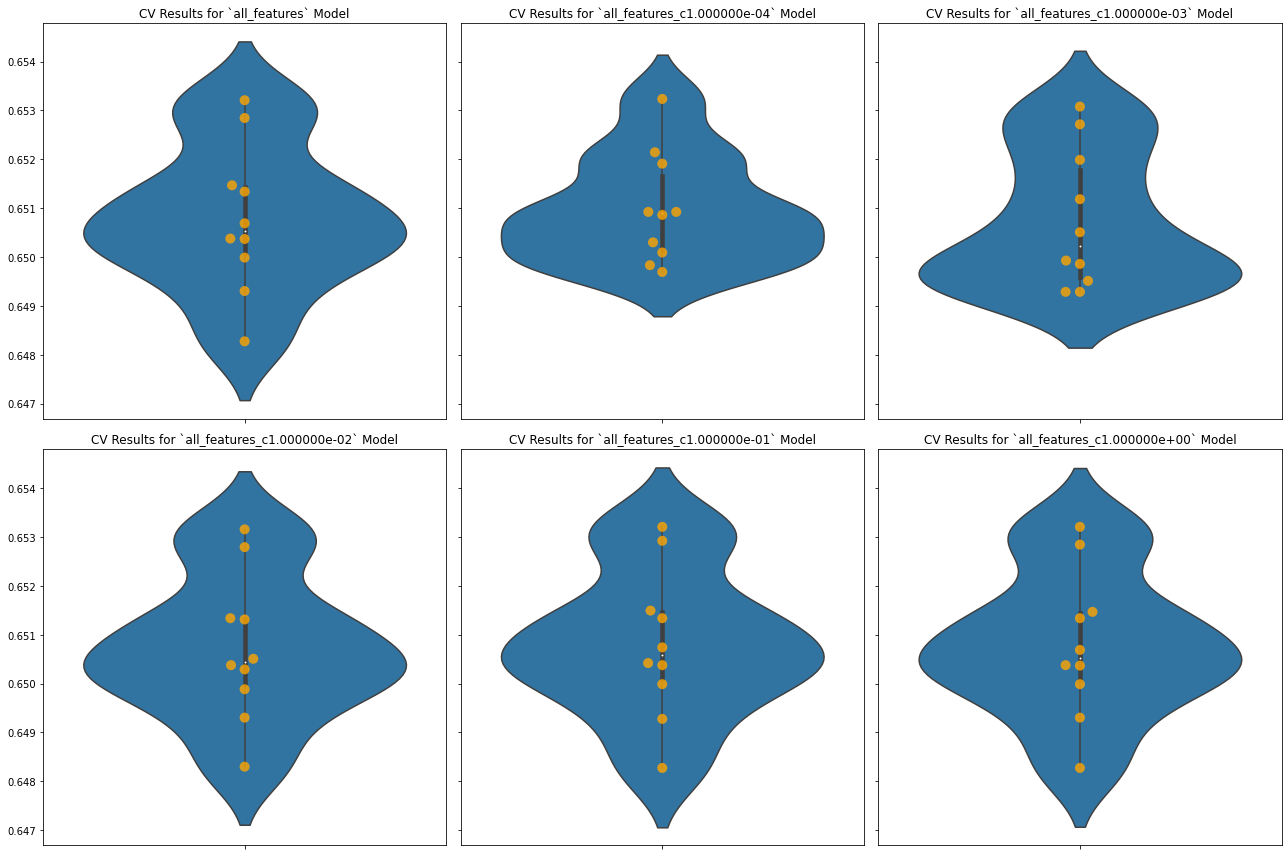

In [118]:
f,axes = plt.subplots(ncols=3, nrows=2, sharey='all', figsize=(18, 12))

for ax,result in zip(axes.ravel(),model_results):
    ax = result.plot_cv(ax)

plt.tight_layout();

In [119]:
model_results = [all_features_results]
all_features_cross_val_score = all_features_results.cv_results

### Different Solvers

In [120]:
model_results = [all_features_results]
all_features_cross_val_score = all_features_results.cv_results

In [121]:
ogreg_model = LogisticRegression(random_state=2021, solver="liblinear")
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1, random_state=2021)

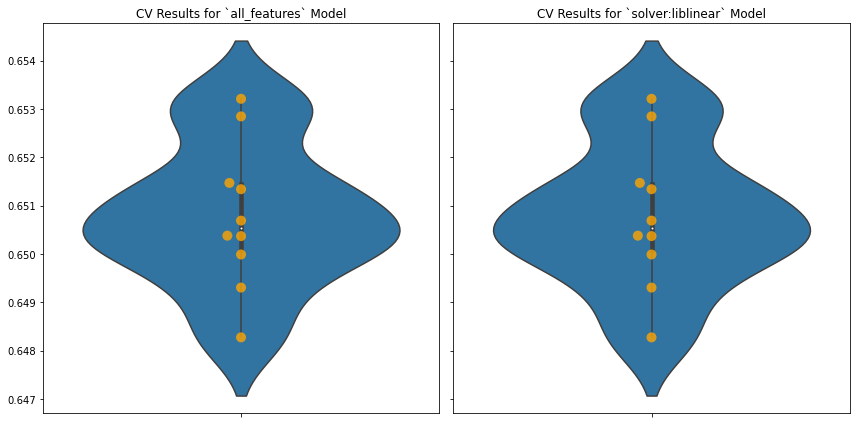

In [122]:
# Save for later comparison
model_results.append(
    ModelWithCV(
        logreg_model, 
        'solver:liblinear',
        X_train,
        y_train
    )
)

# Plot both all_features vs new model
f,axes = plt.subplots(ncols=2, sharey='all', figsize=(12, 6))

model_results[0].plot_cv(ax=axes[0])
model_results[-1].plot_cv(ax=axes[1])

plt.tight_layout();

In [123]:
print("Old:", all_features_cross_val_score)
print("New:", model_results[-1].cv_results)

Old: [0.65284597 0.65068974 0.6514691  0.65320967 0.64827371 0.6513392
 0.65037799 0.64998831 0.65036891 0.64930375]
New: [0.65284597 0.65068974 0.6514691  0.65320967 0.64827371 0.6513392
 0.65037799 0.64998831 0.65036891 0.64930375]


No major difference in the scores. Let's try adding some more regularization:

In [124]:
logreg_model = LogisticRegression(random_state=2021, solver="liblinear", C=0.01)
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=2021, solver='liblinear')

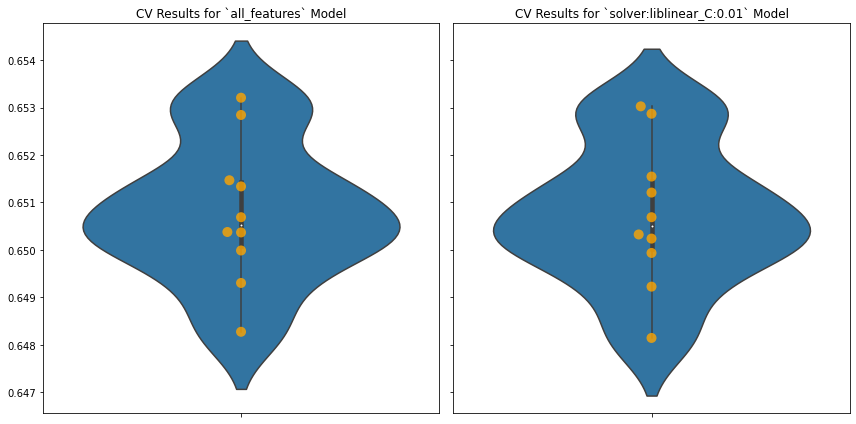

In [125]:
# Save for later comparison
model_results.append(
    ModelWithCV(
        logreg_model, 
        'solver:liblinear_C:0.01',
        X_train,
        y_train
    )
)

# Plot both all_features vs new model
f,axes = plt.subplots(ncols=2, sharey='all', figsize=(12, 6))

model_results[0].plot_cv(ax=axes[0])
model_results[-1].plot_cv(ax=axes[1])

plt.tight_layout();

In [126]:
print("Old:", all_features_cross_val_score)
print("New:", model_results[-1].cv_results)

Old: [0.65284597 0.65068974 0.6514691  0.65320967 0.64827371 0.6513392
 0.65037799 0.64998831 0.65036891 0.64930375]
New: [0.65287195 0.65068974 0.65154703 0.65302782 0.64814382 0.65120931
 0.65032603 0.64993635 0.65023901 0.64922581]


Slightly better, if any. Lets try another different type of penalty.

In [127]:
logreg_model = LogisticRegression(random_state=2021, solver="liblinear", penalty="l1")
logreg_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=2021, solver='liblinear')

In [ ]:
#Save for later comparison
# model_results.append(
#     ModelWithCV(
#         logreg_model, 
#         'solver:liblinear_penalty:l1',
#         X_train,
#         y_train
#     )
# )

# # Plot both all_features vs new model
# f,axes = plt.subplots(ncols=2, sharey='all', figsize=(12, 6))

# model_results[0].plot_cv(ax=axes[0])
# model_results[-1].plot_cv(ax=axes[1])

# plt.tight_layout();

In [160]:
print("Old:", all_features_cross_val_score)
print("New:", model_results[-1].cv_results)

Old: [0.65284597 0.65068974 0.6514691  0.65320967 0.64827371 0.6513392
 0.65037799 0.64998831 0.65036891 0.64930375]
New: [0.65237835 0.64993635 0.65154703 0.65297587 0.6490271  0.65141714
 0.6497545  0.65017016 0.65096643 0.64906994]


This took too long to run. 

In [130]:
logreg_model = LogisticRegression(random_state=2021, solver="liblinear", penalty="l1", C=0.01)
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=2021, solver='liblinear')

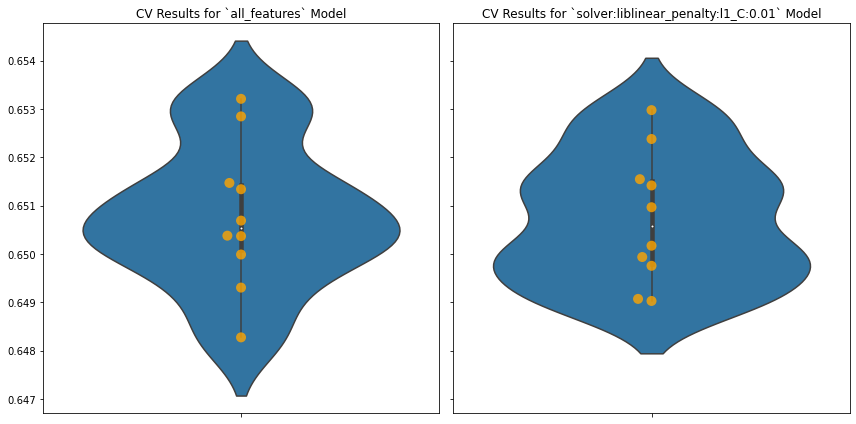

In [131]:
# Save for later comparison
model_results.append(
    ModelWithCV(
        logreg_model, 
        'solver:liblinear_penalty:l1_C:0.01',
        X_train,
        y_train
    )
)

# Plot both all_features vs new model
f,axes = plt.subplots(ncols=2, sharey='all', figsize=(12, 6))

model_results[0].plot_cv(ax=axes[0])
model_results[-1].plot_cv(ax=axes[1])

plt.tight_layout();

In [132]:
print("Old:", all_features_cross_val_score)
print("New:", model_results[-1].cv_results)

Old: [0.65284597 0.65068974 0.6514691  0.65320967 0.64827371 0.6513392
 0.65037799 0.64998831 0.65036891 0.64930375]
New: [0.65237835 0.64993635 0.65154703 0.65297587 0.6490271  0.65141714
 0.6497545  0.65017016 0.65096643 0.64906994]


/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


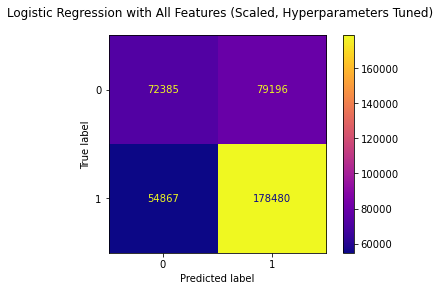

In [133]:
logreg_model = LogisticRegression(random_state=2021, solver="liblinear", penalty="l1")
logreg_model.fit(X_train, y_train)

fig, ax = plt.subplots()

fig.suptitle("Logistic Regression with All Features (Scaled, Hyperparameters Tuned)")

plot_confusion_matrix(logreg_model, X_train, y_train, ax=ax, cmap="plasma");

Very Similar to our previous models scores. 

As we said previously, our model could be overfitting. One way to address is this is to remove features, specifically, ones that have small modeling coefficients. We did this using SelectFromModel.

### SelectFromModel

In [136]:
selector = SelectFromModel(logreg_model)

selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(penalty='l1', random_state=2021,
                                             solver='liblinear'))

In [137]:
#use a default threshold 
thresh = selector.threshold_
thresh

1e-05

In [138]:
#Checking to see how many features will be eliminated
coefs = selector.estimator_.coef_
coefs

array([[ 2.36304387e-02,  2.43132401e-01,  4.49859760e-04,
        -1.83164139e-02,  2.80468515e-03,  7.49647021e-03,
        -1.83110991e-02,  1.30920290e-02,  5.78629130e-04,
        -7.08548587e-04, -4.72612285e-03, -3.47698586e-03,
        -3.56372426e-03,  7.76156179e-03, -3.02292175e-03,
         9.46403551e-03,  1.04878957e-03, -3.43038650e-03,
        -4.54270204e-03,  2.48745129e-02, -1.06311884e-02,
         7.22987847e-03, -1.66823628e-02, -2.56117360e-02,
        -1.60589951e-02,  3.57721691e-02,  1.25462096e-01,
        -8.02633485e-04,  1.16274687e-01,  3.77459939e-02,
        -1.05358797e-02,  1.73526107e-02,  1.86301402e-02,
        -2.75446865e-02, -1.97579468e-01, -2.67910907e-01,
        -6.14615317e-02,  6.49210467e-03, -2.23824456e-03,
         1.27617980e-02, -7.95478798e-03, -1.10903530e-02,
         4.05996855e-02,  8.08239052e-02,  9.44619238e-04,
         1.74134790e-02, -1.14496896e-02, -4.68926083e-03,
         2.34218457e-03, -3.55559977e-02, -1.39281273e-0

In [139]:
coefs.shape

(1, 276)

In [140]:
coefs[coefs > thresh].shape

(161,)

In [141]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [142]:
dict(zip(X_train.columns, selector.get_support()))

{'POSTED_SPEED_LIMIT': True,
 'NUM_UNITS': True,
 'INJURIES_INCAPACITATING': True,
 'CRASH_HOUR': True,
 'CRASH_DAY_OF_WEEK': True,
 'CRASH_MONTH': True,
 'AGE': True,
 'VEHICLE_YEAR': True,
 'BLOWING SAND, SOIL, DIRT': True,
 'BLOWING SNOW': True,
 'CLEAR': True,
 'CLOUDY/OVERCAST': True,
 'FOG/SMOKE/HAZE': True,
 'FREEZING RAIN/DRIZZLE': True,
 'OTHER': True,
 'RAIN': True,
 'SEVERE CROSS WIND GATE': True,
 'SLEET/HAIL': True,
 'SNOW': True,
 'UNKNOWN': True,
 'DARKNESS': True,
 'DARKNESS, LIGHTED ROAD': True,
 'DAWN': True,
 'DAYLIGHT': True,
 'DUSK': True,
 'ANGLE': True,
 'ANIMAL': True,
 'FIXED OBJECT': True,
 'HEAD ON': True,
 'OTHER NONCOLLISION': True,
 'OTHER OBJECT': True,
 'OVERTURNED': True,
 'PARKED MOTOR VEHICLE': True,
 'PEDALCYCLIST': True,
 'PEDESTRIAN': True,
 'REAR END': True,
 'REAR TO FRONT': True,
 'REAR TO REAR': True,
 'REAR TO SIDE': True,
 'SIDESWIPE OPPOSITE DIRECTION': True,
 'SIDESWIPE SAME DIRECTION': True,
 'TRAIN': True,
 'TURNING': True,
 'DRY': True,


In [147]:
def select_important_features(X, selector):
    """
    Given a DataFrame and a selector, use the selector to choose
    the most important columns
    """
    imps = dict(zip(X.columns, selector.get_support()))
    selected_array = selector.transform(X)
    selected_df = pd.DataFrame(selected_array,
                               columns=[col for col in X.columns if imps[col]],
                               index=X.index)
    return selected_df

In [148]:
X_train_selected = select_important_features(X=X_train, selector=selector)

In [149]:
X_train_selected.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,VEHICLE_YEAR,"BLOWING SAND, SOIL, DIRT",BLOWING SNOW,CLEAR,CLOUDY/OVERCAST,FOG/SMOKE/HAZE,FREEZING RAIN/DRIZZLE,OTHER,RAIN,SEVERE CROSS WIND GATE,SLEET/HAIL,SNOW,UNKNOWN,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN,ANGLE,ANIMAL,FIXED OBJECT,HEAD ON,OTHER NONCOLLISION,OTHER OBJECT,OVERTURNED,PARKED MOTOR VEHICLE,PEDALCYCLIST,PEDESTRIAN,REAR END,REAR TO FRONT,REAR TO REAR,REAR TO SIDE,SIDESWIPE OPPOSITE DIRECTION,SIDESWIPE SAME DIRECTION,TRAIN,TURNING,DRY,ICE,OTHER,"SAND, MUD, DIRT",SNOW OR SLUSH,UNKNOWN,WET,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,N,Unknown,Y,N,Unknown,Y,N,Unknown,Y,ANIMAL,BICYCLE ADVANCING LEGALLY ON RED LIGHT,CELL PHONE USE OTHER THAN TEXTING,DISREGARDING OTHER TRAFFIC SIGNS,DISREGARDING ROAD MARKINGS,DISREGARDING STOP SIGN,DISREGARDING TRAFFIC SIGNALS,DISREGARDING YIELD SIGN,DISTRACTION - FROM INSIDE VEHICLE,DISTRACTION - FROM OUTSIDE VEHICLE,"DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",DRIVING ON WRONG SIDE/WRONG WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,EQUIPMENT - VEHICLE CONDITION,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",EXCEEDING AUTHORIZED SPEED LIMIT,EXCEEDING SAFE SPEED FOR CONDITIONS,FAILING TO REDUCE SPEED TO AVOID CRASH,FAILING TO YIELD RIGHT-OF-WAY,FOLLOWING TOO CLOSELY,HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),IMPROPER BACKING,IMPROPER LANE USAGE,IMPROPER OVERTAKING/PASSING,IMPROPER TURNING/NO SIGNAL,MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,NOT APPLICABLE,OBSTRUCTED CROSSWALKS,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PASSING STOPPED SCHOOL BUS,PHYSICAL CONDITION OF DRIVER,RELATED TO BUS STOP,ROAD CONSTRUCTION/MAINTENANCE,ROAD ENGINEERING/SURFACE/MARKING DEFECTS,TEXTING,TURNING RIGHT ON RED,UNABLE TO DETERMINE,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",WEATHER,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",F,M,X,"DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)","DEPLOYED, COMBINATION","DEPLOYED, FRONT","DEPLOYED, SIDE",DEPLOYMENT UNKNOWN,DID NOT DEPLOY,NOT APPLICABLE,CELL PHONE USE OTHER THAN TEXTING,DISREGARDED CONTROL DEVICES,EMERGENCY VEHICLE ON CALL,EVADING POLICE VEHICLE,FAILED TO YIELD,FOLLOWED TOO CLOSELY,IMPROPER BACKING,IMPROPER LANE CHANGE,IMPROPER PARKING,IMPROPER PASSING,IMPROPER TURN,LICENSE RESTRICTIONS,NONE,OTHER,OVERCORRECTED,STOPPED SCHOOL BUS,TEXTING,TOO FAST FOR CONDITIONS,UNKNOWN,WRONG WAY/SIDE,EMOTIONAL,FATIGUED/ASLEEP,HAD BEEN DRINKING,ILLNESS/FAINTED,IMPAIRED - ALCOHOL,IMPAIRED - ALCOHOL AND DRUGS,IMPAIRED - DRUGS,MEDICATED,NORMAL,OTHER,REMOVED BY EMS,UNKNOWN,DISABLED VEHICLE,DRIVER,DRIVERLESS,NON-CONTACT VEHICLE,PARKED,3-WHEELED MOTORCYCLE (2 REAR WHEELS),ALL-TERRAIN VEHICLE (ATV),AUTOCYCLE,BUS OVER 15 PASS.,BUS UP TO 15 PASS.,FARM EQUIPMENT,MOPED OR MOTORIZED BICYCLE,MOTOR DRIVEN CYCLE,MOTORCYCLE (OVER 150CC),OTHER,OTHER VEHICLE WITH TRAILER,PASSENGER,PICKUP,RECREATIONAL OFF-HIGHWAY VEHICLE (ROV),SINGLE UNIT TRUCK WITH TRAILER,SPORT UTILITY VEHICLE (SUV),TRACTOR W/ SEMI-TRAILER,TRACTOR W/O SEMI-TRAILER,TRUCK - SINGLE UNIT,UNKNOWN/NA,VAN/MINI-VAN,AVOIDING VEHICLES/OBJECTS,BACKING,CHANGING LANES,DISABLED,DIVERGING,DRIVERLESS,DRIVING WRONG WAY,ENTER FROM DRIVE/ALLEY,ENTERING TRAFFIC LANE FROM PARKING,LEAVING TRAFFIC LANE TO PARK,MERGING,NEGOTIATING A CURVE,OTHER,PARKED,PARKED IN TRAFFIC LANE,PASSING/OVERTAKING,SKIDDING/CONTROL LOSS,SLOW/STOP - LEFT TURN,SLOW/STOP - LOAD/UNLOAD,SLOW/STOP - RIGHT TURN,SLOW/STOP IN TRAFFIC,STARTING IN TRAFFIC,STRAIGHT AHEAD,TURNING LEFT,TURNING ON RED,TURNING RIGHT,U-TURN,UNKNOWN/NA,N,Unknown,Y,ACURA,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),AUDI,AUTOCAR,BLUE BIRD BODY CO.,BLUEBIRD INTERNATIONAL,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FIAT,FORD,FREIGHTLINER CORP.,FREIGHTLINER CORPORATION,GENERAL MOTORS 

In [154]:
logreg_sel = LogisticRegression(random_state=2021, solver="liblinear", penalty="l1",max_iter=25)

logreg_sel.fit(X_train_selected, y_train)

LogisticRegression(max_iter=25, penalty='l1', random_state=2021,
                   solver='liblinear')

In [ ]:
# Save for later comparison
# select_results = ModelWithCV(
#                     logreg_sel, 
#                     'logreg_sel',
#                     X_train_selected,
#                     y_train
# )

# Plot both all_features vs new model
#f,axes = plt.subplots(ncols=2, sharey='all', figsize=(12, 6))

# model_results[0].plot_cv(ax=axes[0])
# select_results.plot_cv(ax=axes[1])

#plt.tight_layout();

In [ ]:
# print("Old:", all_features_cross_val_score)
# print("New:", select_results.cv_results)

Unfortunately, our final two models were taking too long to run. My kernal kept stopping. So we were not able to get our final models or run a final model evaluation at this time. 

With more time, there is a lot more I would have liked to do.  For starters, there were alot of "unknown"s in our data. I think that running an imputer to impute data into those features could've been very helpful. As seen, the "Unknowns" were ranked among the most important features. From this, we could then run though a decision tree again to find the most important features, allowing us to eliminate the unimportant or overinflating ones, and assigning proper weight to the important ones. I beleive doing all of this would've given us better results on our test. 

# Final Model Evaluation

Now that we have a final model, run X_test through all of the preprocessing steps so we can evaluate the model's performance

In [180]:
# X_test_no_transformations = X_test.copy()

In [181]:
# add missing indicators
# X_test_mi = add_missing_indicator_columns(X_test_no_transformations, indicator)

In [189]:
# separate out values for imputation
# X_test_numeric = X_test_mi[numeric_feature_names]
# X_test_categorical = X_test_mi[categorical_feature_names]

In [190]:
# separate out values for imputation
# impute missing values
# X_test_numeric = impute_missing_values(X_test_numeric, numeric_imputer)
# X_test_categorical = impute_missing_values(X_test_categorical, categorical_imputer)
# X_test_imputed = pd.concat([X_test_numeric, X_test_categorical], axis=1)
# X_test_new = X_test_mi.drop(numeric_feature_names + categorical_feature_names, axis=1)
# X_test_final = pd.concat([X_test_imputed, X_test_new], axis=1)

In [191]:
# one-hot encode categorical data
# for categorical_feature in categorical_feature_names:
#     X_test_final = encode_and_concat_feature(X_test_final,
#                                        categorical_feature, encoders[categorical_feature])

In [192]:
# # scale values
# X_test_scaled = scale_values(X_test_final, scaler)

In [193]:
# select features
# X_test_selected = select_important_features(X_test_scaled, selector)

In [194]:
# X_test_selected.head()

In [195]:
# final_model = LogisticRegression(random_state=2021, solver="liblinear", penalty="l1")
# final_model.fit(X_train_selected, y_train)

# final_model.score(X_test_selected, y_test)

## Compare the past models

In [196]:
# Create a way to categorize our different models
# model_candidates = [
#     {
#         'name':'dummy_model'
#         ,'model':dummy_model
#         ,'X_test':X_test
#         ,'y_test':y_test
#     },
#     {
#         'name':'simple_logreg_model'
#         ,'model':simple_logreg_model
#         ,'X_test':X_test_no_transformations[["SibSp", "Parch", "Fare"]]
#         ,'y_test':y_test
#     },
#     {
#         'name':'logreg_model_more_iterations'
#         ,'model':logreg_model_more_iterations
#         ,'X_test':X_test_final
#         ,'y_test':y_test
#     },
#     {
#         'name':'logreg_model_higher_tolerance'
#         ,'model':logreg_model_higher_tolerance
#         ,'X_test':X_test_final
#         ,'y_test':y_test
#     },
#     {
#         'name':'final_model'
#         ,'model':final_model
#         ,'X_test':X_test_selected
#         ,'y_test':y_test
#     }
# ]

In [197]:
# final_scores_dict = {
#     "Model Name": [candidate.get('name') for candidate in model_candidates],
#     "Mean Accuracy": [
#         candidate.get('model').score(
#                                 candidate.get('X_test'), 
#                                 candidate.get('y_test')
#         ) 
#         for candidate in model_candidates
#     ]
    
# }
# final_scores_df = pd.DataFrame(final_scores_dict).set_index('Model Name')
# final_scores_df

In [198]:
# nrows = 2
# ncols = math.ceil(len(model_candidates)/nrows)

# fig, axes = plt.subplots(
#                 nrows=nrows,
#                 ncols=ncols,
#                 figsize=(12, 6)
# )
# fig.suptitle("Confusion Matrix Comparison")

# # Turn off all the axes (in case nothing to plot); turn on while iterating over
# [ax.axis('off') for ax in axes.ravel()]


# for i,candidate in enumerate(model_candidates):
#     # Logic for making rows and columns for matrices
#     row = i // 3
#     col = i % 3
#     ax = axes[row][col]
    
#     ax.set_title(candidate.get('name'))
#     ax.set_axis_on() 
#     cm_display = plot_confusion_matrix(
#                     candidate.get('model'),
#                     candidate.get('X_test'),
#                     candidate.get('y_test'),
#                     normalize='true',
#                     cmap='plasma',
#                     ax=ax,
                    
#     )
#     cm_display.im_.set_clim(0, 1)

# plt.tight_layout()

In [199]:
# fig, ax = plt.subplots()

# # Plot only the last models we created (so it's not too cluttered)
# for model_candidate in model_candidates[3:]:
#     plot_roc_curve(
#         model_candidate.get('model'),
#         model_candidate.get('X_test'),
#         model_candidate.get('y_test'), 
#         name=model_candidate.get('name'),
#         ax=ax
#     )

In [ ]:
# fig, ax = plt.subplots()

# # Plot the final model against the other earlier models
# plot_roc_curve(
#     final_model, 
#     X_test_selected, 
#     y_test,
#     name='final_model', 
#     ax=ax
# )

# for model_candidate in model_candidates[:3]:
#     plot_roc_curve(
#         model_candidate.get('model'),
#         model_candidate.get('X_test'),
#         model_candidate.get('y_test'), 
#         name=model_candidate.get('name'),
#         ax=ax
#     )